In [2]:
import pandas as pd
import yfinance as yf

Input ticker code and target.
For target, 'up' means the price increase/decrease for the same day as the technical indicator while 'next_up' does for the next day.

In [3]:
# Input ticker code
ticker = 'BBRI.JK'

# Data period
period = '5y'

# Data Acquisition (yfinance)

In [4]:
obj = yf.Ticker(ticker)
print(obj)
df = obj.history(period=period)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.head()

yfinance.Ticker object <BBRI.JK>


,Open,High,Low,Close,Volume
Date,,,,,
2018-05-23 00:00:00+07:00,2304.047356,2420.078518,2295.759416,2386.926758,409918600
2018-05-24 00:00:00+07:00,2428.366400,2544.397559,2420.078460,2536.109619,251856200
2018-05-25 00:00:00+07:00,2560.973339,2594.125098,2502.957762,2585.837158,192249700
2018-05-28 00:00:00+07:00,2594.125519,2726.732574,2585.837578,2693.580811,186045100
2018-05-29 00:00:00+07:00,2693.580811,2693.580811,2693.580811,2693.580811,0


<Axes: xlabel='Date'>

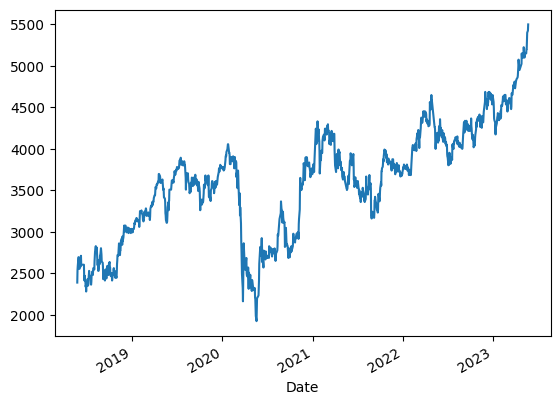

In [5]:
df['Close'].plot()

In [6]:
df[['Open_lag', 'High_lag', 'Low_lag', 'Close_lag', 'Volume_lag']] = df.shift(1)
df

,Open,High,Low,Close,Volume,Open_lag,High_lag,Low_lag,Close_lag,Volume_lag
Date,,,,,,,,,,
2018-05-23 00:00:00+07:00,2304.047356,2420.078518,2295.759416,2386.926758,409918600,NaN,NaN,NaN,NaN,NaN
2018-05-24 00:00:00+07:00,2428.366400,2544.397559,2420.078460,2536.109619,251856200,2304.047356,2420.078518,2295.759416,2386.926758,409918600.0
2018-05-25 00:00:00+07:00,2560.973339,2594.125098,2502.957762,2585.837158,192249700,2428.366400,2544.397559,2420.078460,2536.109619,251856200.0
2018-05-28 00:00:00+07:00,2594.125519,2726.732574,2585.837578,2693.580811,186045100,2560.973339,2594.125098,2502.957762,2585.837158,192249700.0
2018-05-29 00:00:00+07:00,2693.580811,2693.580811,2693.580811,2693.580811,0,2594.125519,2726.732574,2585.837578,2693.580811,186045100.0
...,...,...,...,...,...,...,...,...,...,...
2023-05-16 00:00:00+07:00,5175.000000,5200.000000,5100.000000,5200.000000,73611200,5150.000000,5175.000000,5025.000000,5150.000000,163732600.0
2023-05-17 00:00:00+07:00,5250.000000,5250.000000,5175.000000,5200.000000,115834500,5175.000000,5200.000000,5100.000000,5200.000000,73611200.0
2023-05-19 00:00:00+07:00,5225.000000,5450.000000,5200.000000,5400.000000,185672200,5250.000000,5250.000000,5175.000000,5200.000000,115834500.0


# Linear Regression Model

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'df' is your DataFrame containing the required columns

# Define the features and target variables
features = ['Open_lag', 'High_lag', 'Low_lag', 'Close_lag', 'Volume_lag']
target = 'Close'

# Split the data into training and test sets
train_size = int(0.8 * len(df))  # 80% for training
train_data = df[:train_size].dropna()
test_data = df[train_size:].dropna()

# Create the feature and target matrices for training and test sets
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the trained model
predictions = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, predictions)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)

# Print the predicted values, R-squared, and RMSE
#print("Predictions:", predictions)
print("R-squared:", r2)
print("RMSE:", rmse)

R-squared: 0.9655838959120063
RMSE: 63.18374830637782


In [8]:
results = pd.concat([y_test, pd.DataFrame(predictions, index=y_test.index, columns=['y_pred'])], axis=1)
results

,Close,y_pred
Date,,
2022-05-20 00:00:00+07:00,4168.539551,4158.330691
2022-05-23 00:00:00+07:00,4074.441650,4167.607503
2022-05-24 00:00:00+07:00,4196.769043,4072.286668
2022-05-25 00:00:00+07:00,4093.261475,4183.835808
2022-05-27 00:00:00+07:00,4272.047363,4090.148055
...,...,...
2023-05-16 00:00:00+07:00,5200.000000,5122.170102
2023-05-17 00:00:00+07:00,5200.000000,5172.975756
2023-05-19 00:00:00+07:00,5400.000000,5187.722395


In [9]:
today_feature = df[['Open', 'High', 'Low', 'Close', 'Volume']].tail(1)
today_feature.columns = ['Open_lag', 'High_lag', 'Low_lag', 'Close_lag', 'Volume_lag']
print(today_feature)
tomorrow_predict = model.predict(today_feature)
tomorrow_predict[0]

                           Open_lag  High_lag  Low_lag  Close_lag  Volume_lag
Date                                                                         
2023-05-23 00:00:00+07:00    5475.0    5600.0   5475.0     5500.0   221674600


5501.490813534691

# Logistic Regression Model

In [10]:
df['up'] = False  # initialize 'up' column with 0
df.loc[df['Close'] > df['Close_lag'], 'up'] = True
df[['Close', 'Close_lag', 'up']]

,Close,Close_lag,up
Date,,,
2018-05-23 00:00:00+07:00,2386.926758,NaN,False
2018-05-24 00:00:00+07:00,2536.109619,2386.926758,True
2018-05-25 00:00:00+07:00,2585.837158,2536.109619,True
2018-05-28 00:00:00+07:00,2693.580811,2585.837158,True
2018-05-29 00:00:00+07:00,2693.580811,2693.580811,False
...,...,...,...
2023-05-16 00:00:00+07:00,5200.000000,5150.000000,True
2023-05-17 00:00:00+07:00,5200.000000,5200.000000,False
2023-05-19 00:00:00+07:00,5400.000000,5200.000000,True


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the features and target variables
features = ['Open_lag', 'High_lag', 'Low_lag', 'Close_lag', 'Volume_lag']
target = 'up'

# Split the data into training and test sets
train_size = int(0.8 * len(df))  # 80% for training
train_data = df[:train_size].dropna()
test_data = df[train_size:].dropna()

# Create the feature and target matrices for training and test sets
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Create and fit the linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Test the trained model
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.5060240963855421


In [13]:
predict_proba = model.predict_proba(today_feature)
predict_proba

array([[0.5352013, 0.4647987]])